In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


# Tiền xử lý dữ liệu - Data preprocessing

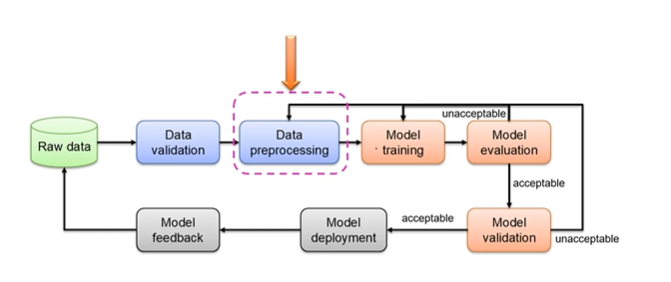

## Phát hiện & Xử lý dữ kiệu bị thiếu

Trong pandas, ta có thể sử dụng hàm `isnull()`/`isna()` để kiểm tra bảng cột bị thiếu dữ liệu hay không

Có ba cách tiếp cận chính:

- Loại bỏ hàng hoặc cột có tỉ lệ dữ liệu bị thiếu lớn (vd:50%) - Đơn giản nhưng dễ làm mất dữ liệu quan trọng
- Thay thế đơn biến, đa biến, chuỗi thời gian: sklearn-imputation
- Sử dụng các mô hình máy học để dữ đoán

Cách tiếp cận khác: tạo cột mới chưa thông tin có giá trị bị thiếu

Các phương pháp:

- Thay thế đặt trưng đơn biến (mean, median, mode)
  - Cách thực hiện: thay thế giá trị còn thiếu bằng giá trị trung bình, trung vị, hoặc giá trị xuất hiện thường xuyên nhất của một biến
  - Đặc điểm: đơn giản, giá trị khó phản ánh đúng
- Thay thế giá trị hằng số
  - Cách thực hiện: thay thế giá trị còn thiếu bằng một giá trị không đổi. Ví dụ "NaN" đối với các biến phân loại
  - Đặc điểm: đơn giản, giá trị khó phản ánh đúng
- Thay thế bằng phương pháp K-Nearest Neighbors
  - Cách thực hiện: thay thế giá trị bị thiếu bằng giá trị trung bình hoặc tổng trọng số K láng giềng trong không gian đặc trưng
  - Đặc điểm: chính xác hơn, có thể tốn kém về chi phí tính toán với tập dữ liệu lớn
- Phép nội suy tuyến tính
  - Cách thực hiện: thay thế giá trị bị thiếu bằng giá trị được nội suy tuyến tính dựa trên các điểm dữ liệu không bị thiếu lân cận
  - Đặc điểm: Giá sử mối quan hệ tuyến tính giữa các dữ liệu, có thể không phù hợp với mọi dữ liệu
- Thay thế bằng phương pháp hồi quy
  - Cách thực hiện: ước tính giá trị còn thiếu bằng cách khớp mô hình hồi quy sử dụng các biến khác làm yếu tố dự đoán
  - Đặc điểm: chính xác hơn, có thể gây ra hiện tượng đa cộng tuyến và quá khớp nếu các đặc trưng có mối tương quan cao với đặc trưng khác
- Thay thế dựa trên mô hình
  - Sử dụng mô hình máy học để ước tính các giá trị còn thiếu dựa trên dữ liệu được quan sát
  - Đặc điểm: chính xác cao, có thể phức tạp hơn, tốn kém hơn về mặt tính toán

## Phát hiện & Xử lý dữ liệu ngoại lệ

Có 2 cách tiếp cận:

- Phương pháp thống kê
- Tự động phát hiện ngoại lệ
  - Local Outlier Factor
  - Isolation Forest
  - EllipticEnvelope
  - One-class SVM
- Công cụ tự động: CleanLab tìm OOD, phát hiện vấn đề dữ liệu

Tương tự như xử lý dữ liệu bị thiếu:

 - Loại bỏ
 - Thay thế đơn giản
 - Sử dụng mô hình dự đoán

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [4]:
# Re indexing
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df.set_index('PassengerId', inplace=True)
df.reset_index(drop=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [5]:
# Re-formatting
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df['Pclass'] = df['Sex'].astype(str)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,male,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,female,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,male,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,male,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,female,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,female,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,male,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [6]:
# Cosrrecting inconsistent data
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df['Sex'] = df['Sex'].str.replace('female', 'F')
df['Sex'] = df['Sex'].replace('male', 'M')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,30.0000,C


In [7]:
# Remove duplicate
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df = df.drop_duplicates() # Loại bỏ dữ liệu trùng lắp
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [8]:
# Drop unnescessary columns
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df = df.drop(columns = 'PassengerId', axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [9]:
# Drop/Filter unecessary rows
df = pd.read_csv('/content/drive/MyDrive/Python_ML/Theory/Data/stocks.csv')
df.drop([0,1], inplace=True) # Xóa hàng 0,1
df = df[df['Sex']!='male'] # Loại bỏ hàng có giới tính là Nam (male)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S
...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


## Tạo đặc trưng mới - Feature extraction

Biến đổi toán học giữa các đặt trưng đã có


In [10]:
df = pd.DataFrame({
    "Nhân viên" : ["Nhân viên A", "Nhân viên B", "Nhân viên C", "Nhân viên D", "Nhân viên E"],
    "Vận tốc" : [7, 9, 11, 20, 10],
    "Thời gian" : [8, 10, 6, 4, 3]
})
print("df gốc: ")
print(df)
print()
df["Quãng đường"] = df['Vận tốc']*df['Thời gian']
df

df gốc: 
     Nhân viên  Vận tốc  Thời gian
0  Nhân viên A        7          8
1  Nhân viên B        9         10
2  Nhân viên C       11          6
3  Nhân viên D       20          4
4  Nhân viên E       10          3



,Nhân viên,Vận tốc,Thời gian,Quãng đường
0,Nhân viên A,7,8,56
1,Nhân viên B,9,10,90
2,Nhân viên C,11,6,66
3,Nhân viên D,20,4,80
4,Nhân viên E,10,3,30


Đếm tần số xuất hiện

In [11]:
df = pd.DataFrame({
    "Value" : [100, 150, 50, 200, 100, 100],
    "Color" : ["Red", "Red", "Blue", "Red", "Green", "Blue"]
})
print("df gốc: ")
print(df)
print()
df["Color_count"] = df['Color'].map(df["Color"].value_counts())
df

df gốc: 
   Value  Color
0    100    Red
1    150    Red
2     50   Blue
3    200    Red
4    100  Green
5    100   Blue



,Value,Color,Color_count
0,100,Red,3
1,150,Red,3
2,50,Blue,2
3,200,Red,3
4,100,Green,1
5,100,Blue,2


Phân rã đặc trưng

- Một số đặc trưng ở dạng chuỗi phức tạp, nhưng có cấu trúc -> có thể phân rã thành nhiều đặc trưng
- Ví dụ: "0612450" -> Năm 2006, hệ chính quy, khoa KHMT, STT: 450

Tổng hợp đặc trưng

- Có thể tổng hợp đặc trưng từ nhiều thành phần

In [12]:
df = pd.DataFrame({
    "Make" : ["Toyota", "Audi", "Honda", "Honda", "Toyota", "Mercedes"],
    "Type" : ["Senda", "Senda", "Crossover", "Hatchback", "SUV", "Sendan"],
})
print("df gốc: ")
print(df)
print()
df["Make_Type"] = df["Make"] + "_" + df["Type"]
df

df gốc: 
       Make       Type
0    Toyota      Senda
1      Audi      Senda
2     Honda  Crossover
3     Honda  Hatchback
4    Toyota        SUV
5  Mercedes     Sendan



,Make,Type,Make_Type
0,Toyota,Senda,Toyota_Senda
1,Audi,Senda,Audi_Senda
2,Honda,Crossover,Honda_Crossover
3,Honda,Hatchback,Honda_Hatchback
4,Toyota,SUV,Toyota_SUV
5,Mercedes,Sendan,Mercedes_Sendan


Tổng hợp theo nhóm

- Tổng hợp thông tin trên nhiều dòng dữ liệu, thực hiện theo nhóm
- Sử dụng grpuby, tổng hợp theo `mean`, `max`, `min`



In [13]:
df = pd.DataFrame({
    "City" : ["Danang", "HCM", "Hanoi", "HCM", "HCM", "Hanoi", "Danang"],
    "Salary" : [10, 20, 15, 8, 12, 15, 14]
})
print("df gốc: ")
print(df)
print()
df['Salary_mean'] = df.groupby('City')['Salary'].transform('mean')
df

df gốc: 
     City  Salary
0  Danang      10
1     HCM      20
2   Hanoi      15
3     HCM       8
4     HCM      12
5   Hanoi      15
6  Danang      14



,City,Salary,Salary_mean
0,Danang,10,12.000000
1,HCM,20,13.333333
2,Hanoi,15,15.000000
3,HCM,8,13.333333
4,HCM,12,13.333333
5,Hanoi,15,15.000000
6,Danang,14,12.000000


Đặt trưng thành phần chính PCA

- Các thành phần chính của dữ liệu có thể mang lại nhiều thông tin hơn các đặc trưng ban đầu -> phân tích các thành phần chính

## Biến đổi đặc trưng - Feature transformation

Tại sao cần biến đối đặc trưng

 - Yêu cầu dữ liệu đầu vào mô hình
  - Nhiều mô hình yêu cầu dữ liệu dạng số, trong khi đặc trưng có thể ở dạng khác nhau
  - Biến đổi dữ liệu dạng khác về dạng số -> mô hình có thể chạy được
  
- Giả định dữ liệu đầu vào của mô hình
  - Nhiều mô hình máy học đặt giả định về phân bố và tỉ lệ (scale) của dữ liệu đầu vào
  - Biến đổi từ dữ liệu gốc về các tỉ lệ/phân bố giả định của mô hình (normalize/scale dữ liệu) -> chính xác hơn, học nhanh hơn
- Vấn đề dữ liệu nhiễu
  - Các giá trị nhiễu có thể ảnh hưởng lớn đến hiệu quả mô hình
  - Biến đổi lag transform, robust scaler -> giảm sự ảnh hưởng dữ liệu nhiễu
- Vấn đề giải thích kết quả
  - Đặc trưng có giá trị liên tục có thể làm mô hình khó hiểu, giải thích
  - Binning transformer -> chia khoảng giá trị -> mỗi khoảng có một ý nghĩa
- Vấn đề quan hệ phi tuyến giữa các đặc trưng
  - Quan hệ phi tuyến làm cho mô hình hóa và giải thích trở nên khó khăn hơn
  - Biến đổi chuyển về dạng tuyến tính: log transform -> đơn giản hơn
  - Ex: Y = b*exp(a*X) -> log(Y) = log(b) + a*X

Biến đổi dữ liệu dạng số

- Min-Max scaling
  - x' = x-min(x)/max(x)-min(x) -> [0,1]
- Standardization (Z-score scaling)
  - z = (x-u)/ơ -> N(0,1)
- Robust Scaler
  - x = (x-median)(Q3-Q1)
- Log transform
- Rời rạc hóa (Discretization hay binning)

Biến đổi dữ liệu dạng danh mục (phân loại)
  - One-hot encoding
  - Ordinal encoding
  - Label encoding
  - Target encoding

## Chọn lựa đặc trưng - Feature selection

### Tại sao cần phải chọn lựa đặc trưng



- Vấn đề độ chính xác của mô hình
  - Các đặc trưng không liên quan và dư thừa làm mô hình bị nhiễu
  - Chỉ chọn đặc trưng phù hợp -> giảm nhiễu -> tăng độ chính xác
- Vấn đề ovetfitting
  - Mô hình phức tạp hấp thụ các đặc trưng nhiễu nhiều hơn mô hình đơn giản
  - Loại bỏ đặc trưng nhiễu -> mô hình đơn giản hơn -> tránh overfitting
- Vấn đề thời gian và chi phí huấn luyện
  - Nhiều đặc trưng -> mô hình phức tạp -> tốn chi phí thời gian tính toán
  - Chọn đặc trưng quan trọng nhất -> giảm chi phí và thời gian
- Vấn đề khả năng giải thích mô hình
  - Mô hình quá nhiều đặc trưng -> khó giải thích (cho khách hàng)
  - Chỉ chọn những đặc trưng quan trọng -> dễ giải thích và dễ hiểu lý do ra quyết định của mô hình hơn

### Một số kỹ thuật chọn đặc trưng



- Phương pháp Filter: chọn lọc feature thỏa mãn tiêu chí nào đó
- Phương pháp Wrapper
- Phương pháp Embedded
- Phương pháp giảm chiều

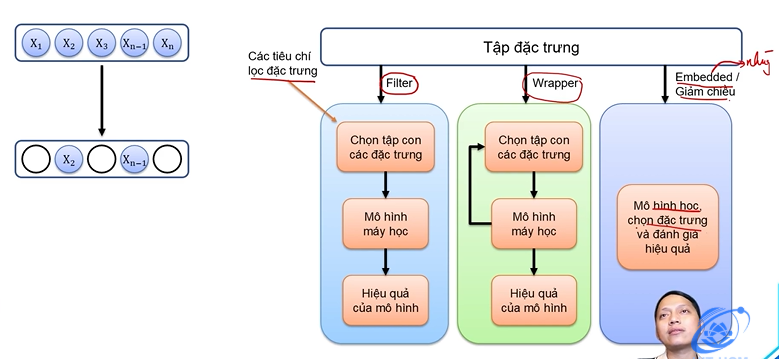

**Phương pháp 1: Filter**

- Áp dụng một loại chỉ số để loại bỏ các đặc trưng không liên quan hoặc dư thừa
  - Hệ số tương quan Pearson
  - Ngưỡng phương sai - variance
  - Tỉ lệ dữ liệu bị thiếu - Missing data radio
  - Thông tin tương hổ - Mutual Information (MI)
- Nhận xét
  - Ưu điểm: nhanh, dễ hiểu, dễ thực hiện
  - Khuyết điểm: thiếu tự tương tác giữa các đặc trưng, có thể bỏ lỡ đặc trưng tối ưu và xóa thừa dữ liệu

**Phương pháp 2: Wrapper**
- Sử dụng mô hình dự đoán để đánh giá hiệu quả các tập hợp con đặc trưng
  - Lựa chọn tiến - Forward selection
  - Lựa chọn lùi - Backwark selection
  - Recursive Feature Elimination - RFE
  - Recursive Feature Elimination với kiểm định chéo - RFECV
- Wrapper với Random Bar: so sánh mức độ quan trọng giữa các đặc trưng với đặc trưng ngẫu nhiên
  - Bước 1: Đưa một đặc trưng đặc biệt (random feature), các giá trị trên cột khởi tạo ngẫu nhiên
  - Bước 2: Đem dữ liệu đã có random feature vào mô hình huấn luyện -> Đánh giá mức quan trọng của đặc trưng
  - Bước 3: Lặp đi lặp lại quá bước trên cho đến ngưỡng dừng
- Nhận xét
  - Ưu điểm: có sự tương tác giữa các đặc trưng, tập con đặc trưng tối ưu theo mô hình
  - Khuyết điểm: chi phí lớn, dễ bị overfitting, phức tạp hơn so với Filter

**Phương pháp 3: Embedded model**
- Chọn lựa đặc trưng là một phần trong quá trình học của mô hình
 - Lasso Regression (L1 regularization)
 - Ridge Regression (L2 regularization)
 - Elastic Net (L1 + L2 regularization)
 - Mô hình máy học dựa trên cây - Tree base Model
- Nhận xét
  - Ưu điểm: hiệu quả tính toán cao hơn Wrapper, tính tổng quát hơn, có sự tương tác giữa các feature
  - Khuyết điểm: khả năng giải thích đặc trưng thấp hơn pp Filter, khả năng bị overfit với mô hình phức tạp hoặc dữ liệu nhỏ

**Phương pháp 4: Giảm chiều dữ liệu**
- Dựa trên nền tảng máy học không giám sát: PCA, ICA
- Nhận xét
  - Ưu điểm: hiệu quả tính toán cao, trực quan hóa 2D 3D, loại bỏ được các đặc trưng nhiễu
  - Khuyết điểm: khả năng giải thích đặc trưng thấp, không phù hợp với dữ liệu phân loại, không cung cấp được tập con cụ thể các đặc trưng quan trọng

Một số công cụ chọn lựa đặc trưng
- Các pp tiếp cận trên được cài đặt, hỗ trợ API, thư viện sau:
  - API của Sklearn
  - Thư viện Leave One Feature Out - LOFO
  - SHapley Additive exPlanations - SHAP
  - Boruta-Shap
  - ELI5